In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

In [2]:
from pydataset import data

# import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# 1. Clustering with the Iris Dataset

### a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means

X = iris[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


array([[<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

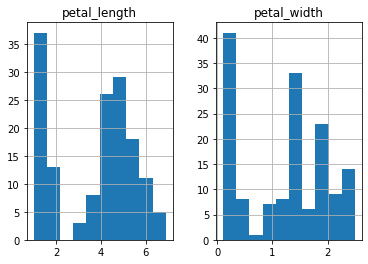

In [5]:
X.hist()

In [6]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### b. Visualize the results of your clustering.

In [8]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

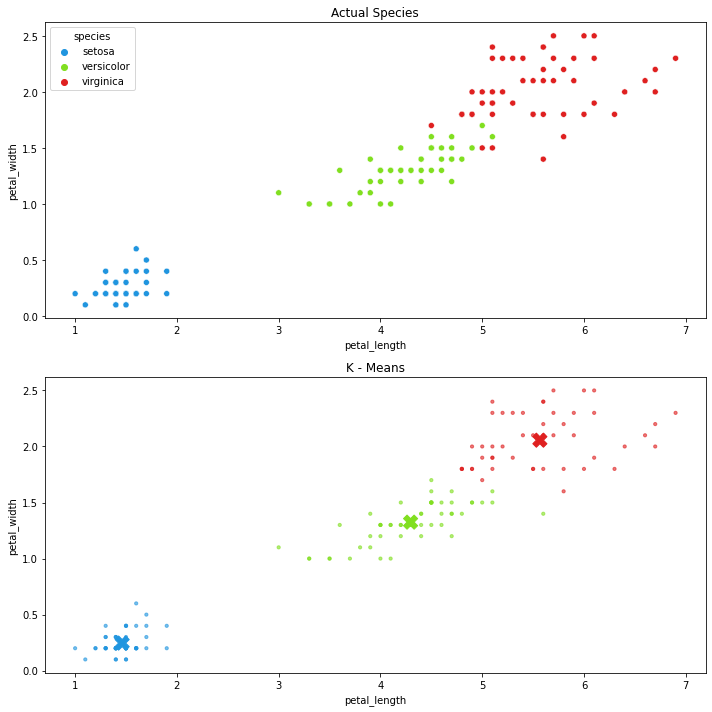

In [9]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris2(iris, kmeans)

### c. Use the elbow method to visually select a good value for k.

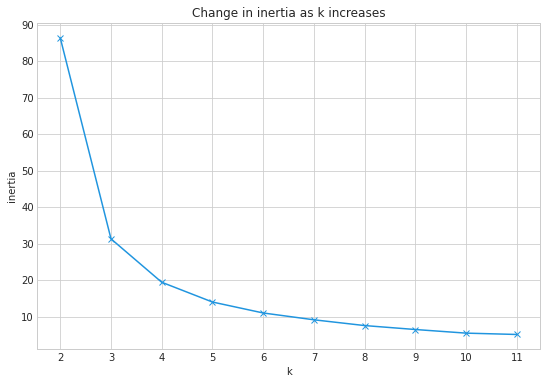

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### d. Repeat the clustering, this time with 3 different features.

In [11]:
# define independent variables for k-means

uy = iris[['sepal_length','petal_length', 'petal_width']]
uy.head()

,sepal_length,petal_length,petal_width
1,5.1,1.4,0.2
2,4.9,1.4,0.2
3,4.7,1.3,0.2
4,4.6,1.5,0.2
5,5.0,1.4,0.2


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>, <AxesSubplot:>]],
      dtype=object)

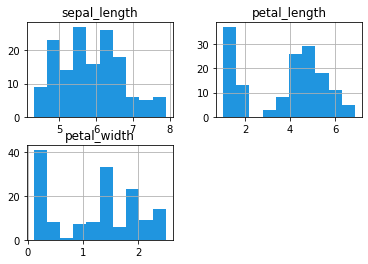

In [12]:
uy.hist()

In [13]:
# Scale the uy

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(uy)
uy_scaled = pd.DataFrame(scaler.transform(uy), columns= uy.columns).set_index([uy.index.values])

In [14]:
uy_scaled.head()

,sepal_length,petal_length,petal_width
1,-0.900681,-1.340227,-1.315444
2,-1.143017,-1.340227,-1.315444
3,-1.385353,-1.397064,-1.315444
4,-1.506521,-1.283389,-1.315444
5,-1.021849,-1.340227,-1.315444


In [15]:
# sklearn implementation of KMeans

#define the thing
kmeans_uy_scaled = KMeans(n_clusters=3, random_state = 123, verbose = 0)

# fit the thing
kmeans_uy_scaled.fit(uy_scaled)

# Use (predict using) the thing 
kmeans_uy_scaled.predict(uy_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [16]:
# # make a new column names cluster in iris and X_scaled dataframe

# iris['uy_cluster'] = kmeans.predict(uy_scaled)

# uy_scaled['cluster'] = kmeans.predict(uy_scaled)

# the visual doesn't work bc of 3 dimensions i think
### taking a stab at a 3d viz below...

In [17]:
kmeans_uy_scaled.predict(uy_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [18]:
import re, seaborn as sns
import numpy as np
# from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

<IPython.core.display.Javascript object>


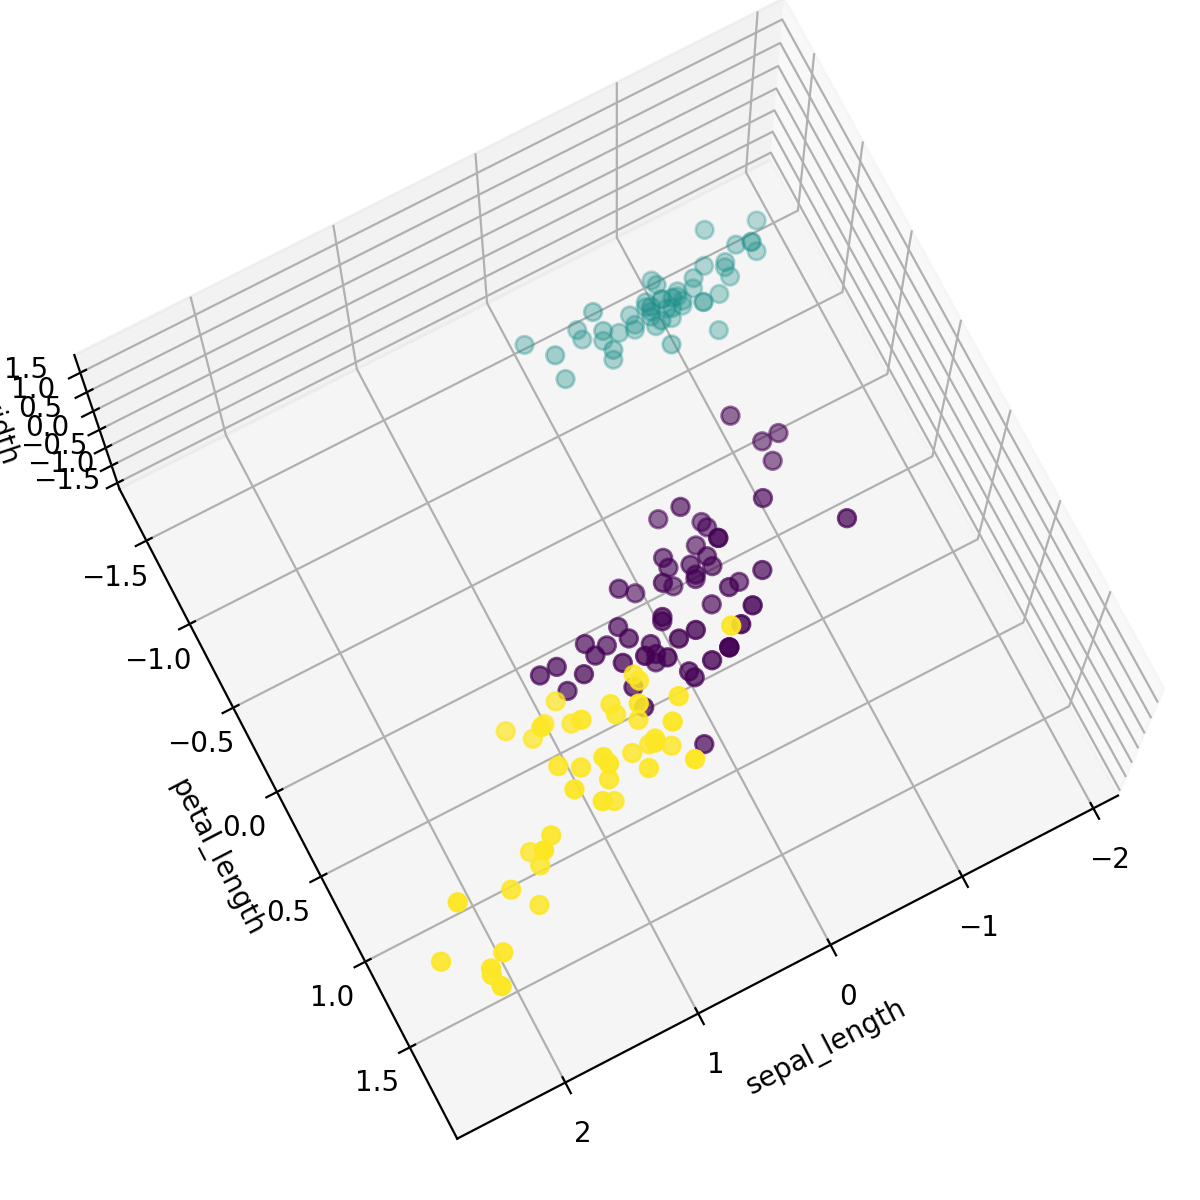

In [48]:
# The following command will make the graphic interactive
# but it creates problems for subsequent graphics and should be commented out 
# until it's being used

# %matplotlib notebook



# assigning the graphing data
x = uy_scaled.sepal_length
y = uy_scaled.petal_length
z = uy_scaled.petal_width
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)
# get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
t = kmeans_uy_scaled.predict(uy_scaled)
# plot
# the x,y,z labels might need to be specific...
sc = ax.scatter(x, y, z, s=40, c=t, marker='o')#, cmap=t, alpha=1)
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')


try to make it interactive (like rotation)

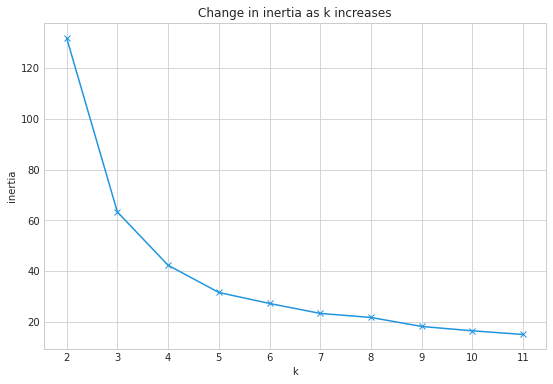

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(uy).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [21]:
import wrangle_mall
min_max_scaler, train, validate, test = wrangle_mall.wrangle_mall_df()

In [22]:
train.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

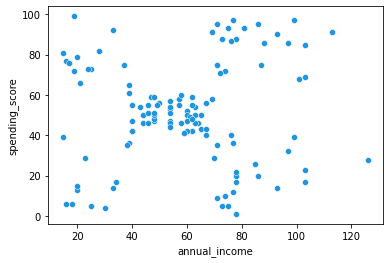

In [23]:
sns.scatterplot(x='annual_income',y='spending_score',data=train)

In [24]:
# define independent variables for k-means

Z = train[['annual_income', 'spending_score']]
Z.head()

,annual_income,spending_score
customer_id,,
182,97,86
49,40,42
35,33,14
186,99,97
114,64,46


array([[<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>]], dtype=object)

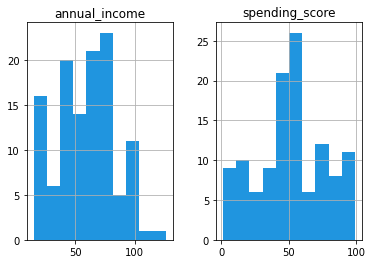

In [25]:
Z.hist()

In [26]:
# Scale the Z

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(Z)
Z_scaled = pd.DataFrame(scaler.transform(Z), columns= Z.columns).set_index([Z.index.values])

In [27]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(Z_scaled)

# Use (predict using) the thing 
kmeans.predict(Z_scaled)

array([3, 1, 2, 3, 1, 1, 3, 4, 0, 0, 0, 3, 1, 2, 4, 0, 4, 4, 4, 0, 2, 1,
       4, 2, 1, 1, 0, 1, 2, 1, 4, 1, 1, 3, 1, 1, 1, 4, 1, 0, 1, 4, 4, 1,
       1, 1, 1, 4, 4, 2, 0, 3, 3, 1, 4, 4, 1, 2, 4, 1, 1, 1, 3, 2, 3, 1,
       1, 3, 3, 1, 3, 3, 2, 1, 1, 4, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 3, 1, 0, 1, 3, 0, 1, 0, 1, 1, 4, 1, 1, 4, 3, 1, 1,
       4, 4, 3, 1, 3, 4, 3, 1], dtype=int32)

In [28]:
# make a new column names cluster in iris and X_scaled dataframe

train['cluster'] = kmeans.predict(Z_scaled)

Z_scaled['cluster'] = kmeans.predict(Z_scaled)

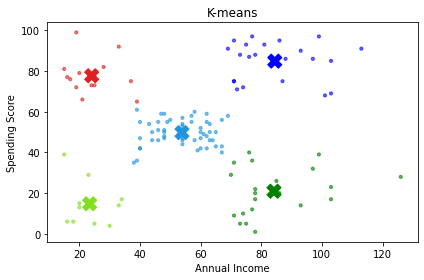

In [29]:
# Taking a stab at graphing here...
centroids = np.array(train.groupby('cluster')['annual_income', 'spending_score'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
train['cen_x'] = train.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
train['cen_y'] = train.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4]})

colors = ['#DF2020','#2095DF', '#81DF20','b','g' ]
train['c'] = train.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3],4:colors[4]})

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020','b','g']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

# Plotting the clusters here...
plt.scatter(train.annual_income, train.spending_score, c=train.c, alpha = 0.6, s=10)
# fig.set_label(xlabel = 'annual_income', ylabel = 'spending_score', title = 'K - Means')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K-means")
# plot centroids on  ax2
plt.scatter(cen_x, cen_y, marker='X', c=colors, s=200)


train.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

# 3. How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [30]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=5, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(Z)

# Use (predict using) the thing 
kmeans.predict(Z)

array([1, 0, 3, 1, 0, 0, 1, 4, 2, 2, 2, 1, 0, 3, 4, 2, 4, 4, 4, 2, 3, 0,
       4, 3, 0, 0, 2, 0, 3, 0, 4, 0, 0, 1, 0, 0, 0, 4, 0, 2, 0, 4, 4, 0,
       0, 0, 0, 4, 4, 3, 2, 1, 1, 0, 4, 4, 0, 3, 4, 0, 0, 0, 1, 3, 1, 0,
       0, 1, 1, 0, 1, 1, 3, 0, 0, 4, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 4, 0, 0, 4, 1, 0, 0,
       4, 4, 1, 0, 1, 4, 1, 0], dtype=int32)

In [31]:
# make a new column names cluster in iris and X_scaled dataframe

train['Z_cluster'] = kmeans.predict(Z)

Z['cluster'] = kmeans.predict(Z)

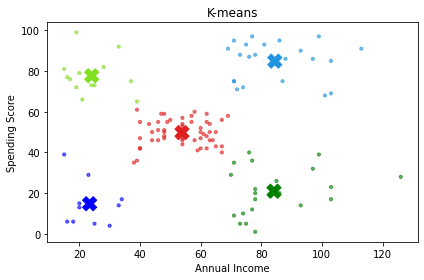

In [32]:
# Taking a stab at graphing here...
centroids = np.array(Z.groupby('cluster')['annual_income', 'spending_score'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
Z['cen_x'] = Z.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3], 4:cen_x[4]})
Z['cen_y'] = Z.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3], 4:cen_y[4]})

colors = ['#DF2020','#2095DF', '#81DF20','b','g' ]
Z['c'] = Z.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3],4:colors[4]})

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020','b','g']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

# Plotting the clusters here...
plt.scatter(Z.annual_income, Z.spending_score, c=Z.c, alpha = 0.6, s=10)
# fig.set_label(xlabel = 'annual_income', ylabel = 'spending_score', title = 'K - Means')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("K-means")
# plot centroids on  ax2
plt.scatter(cen_x, cen_y, marker='X', c=colors, s=200)


Z.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

##  What about the change in inertia as k changes?

In [50]:
# code here
# develop this more, like what ravinder did in the review

# Bonus
### a) Read in the data from this google sheet: 
https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

In [33]:
goog=pd.read_csv("cluster_data.csv - Sheet1.csv")
goog.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


b) Visualize the data and guess the number and shape of the clusters.

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

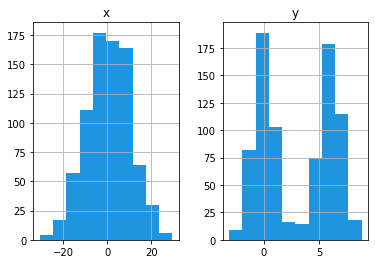

In [34]:
goog.hist()

<IPython.core.display.Javascript object>


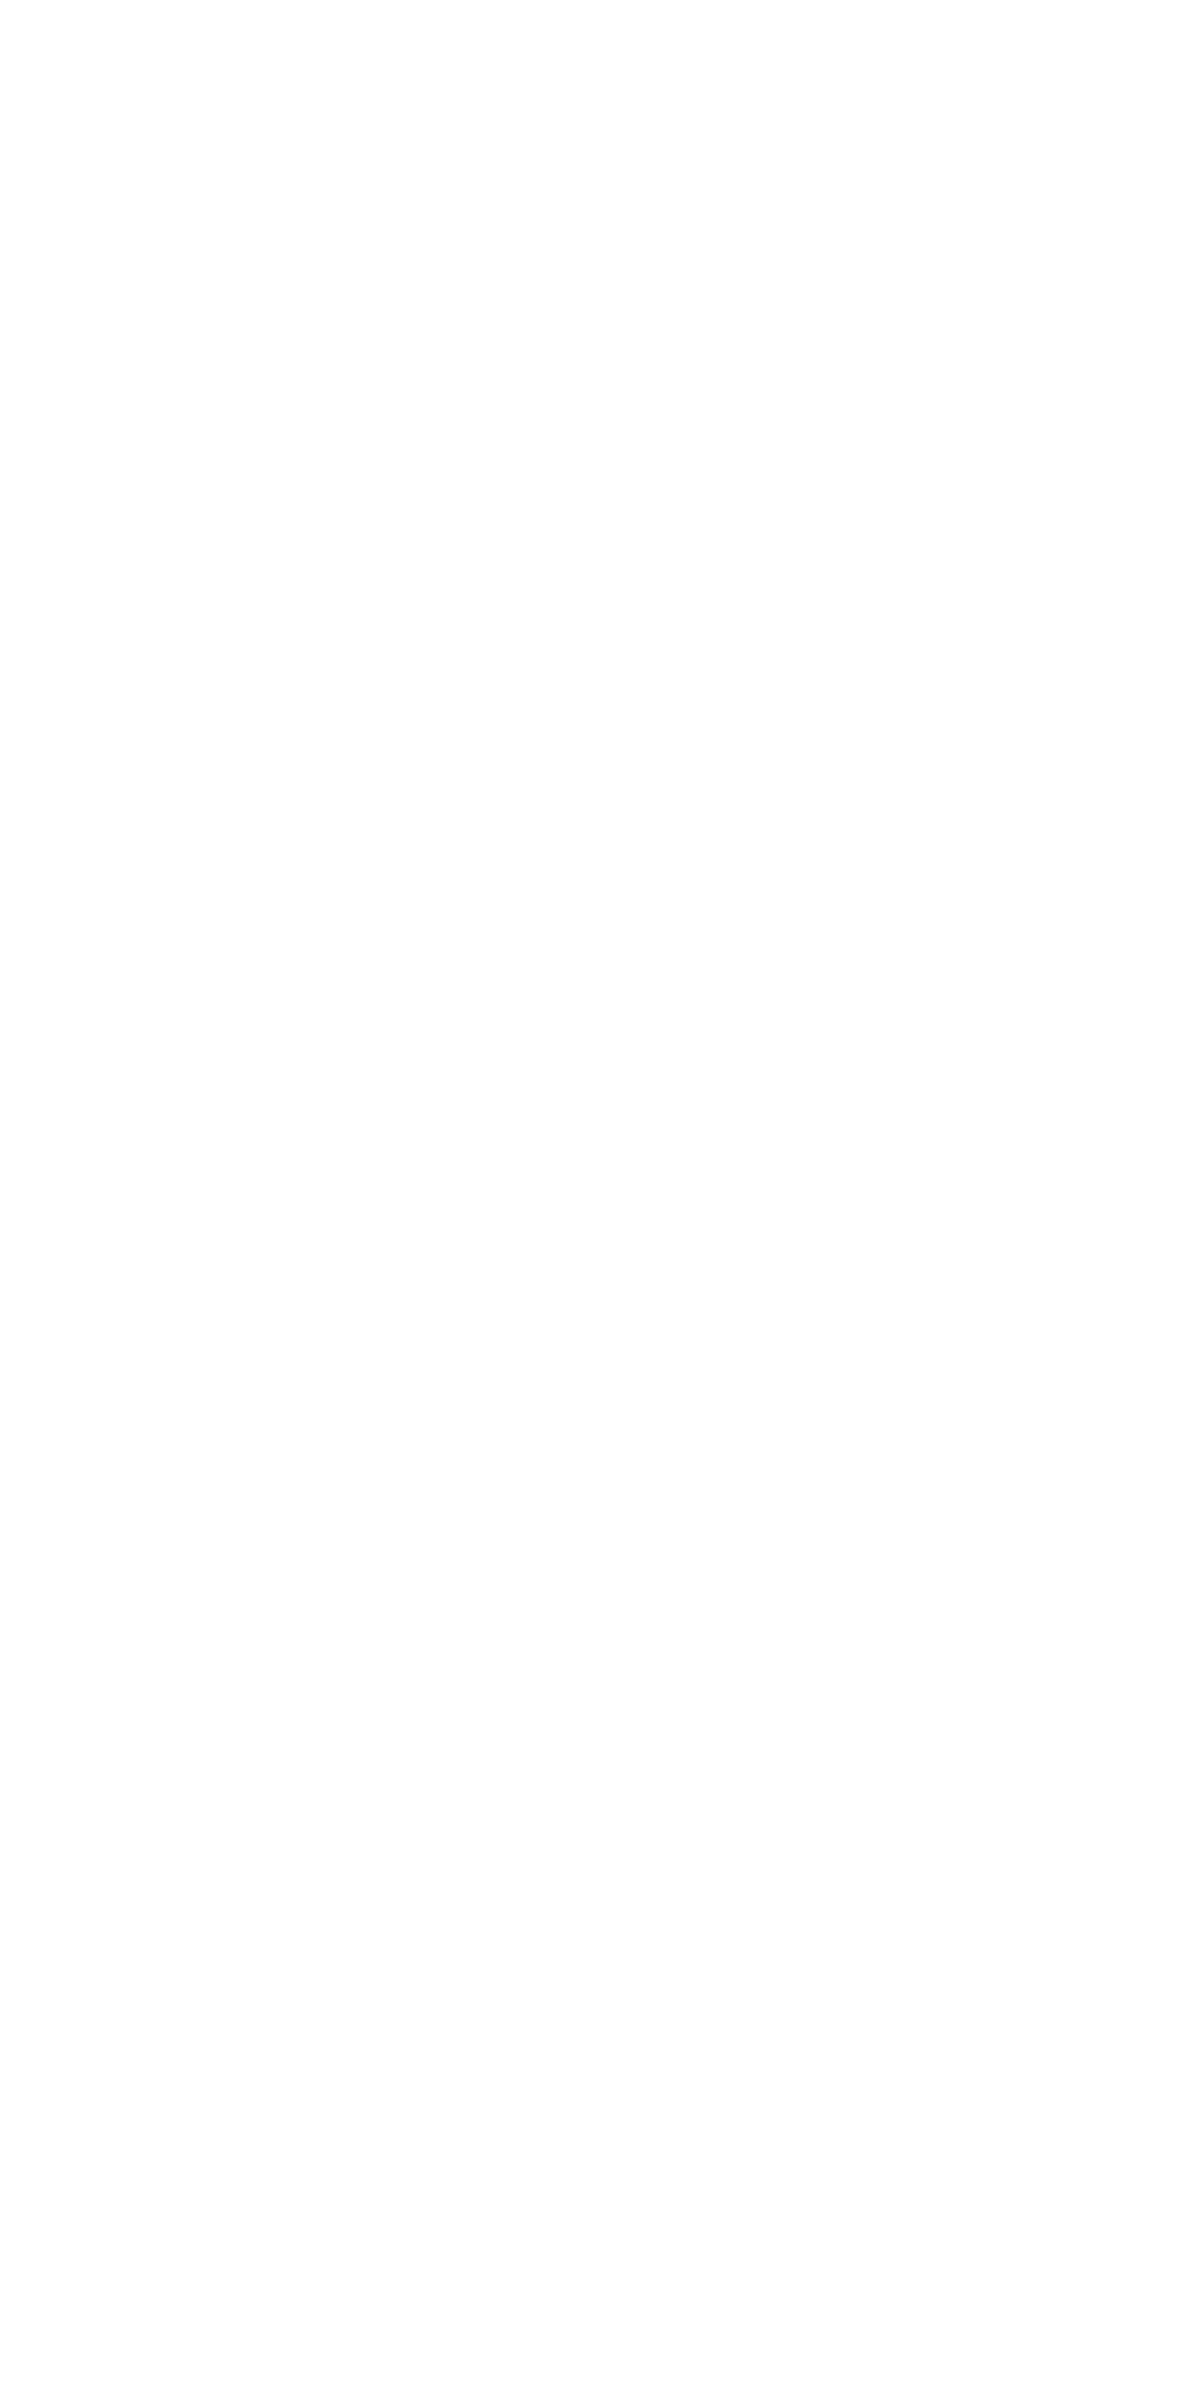

<IPython.core.display.Javascript object>


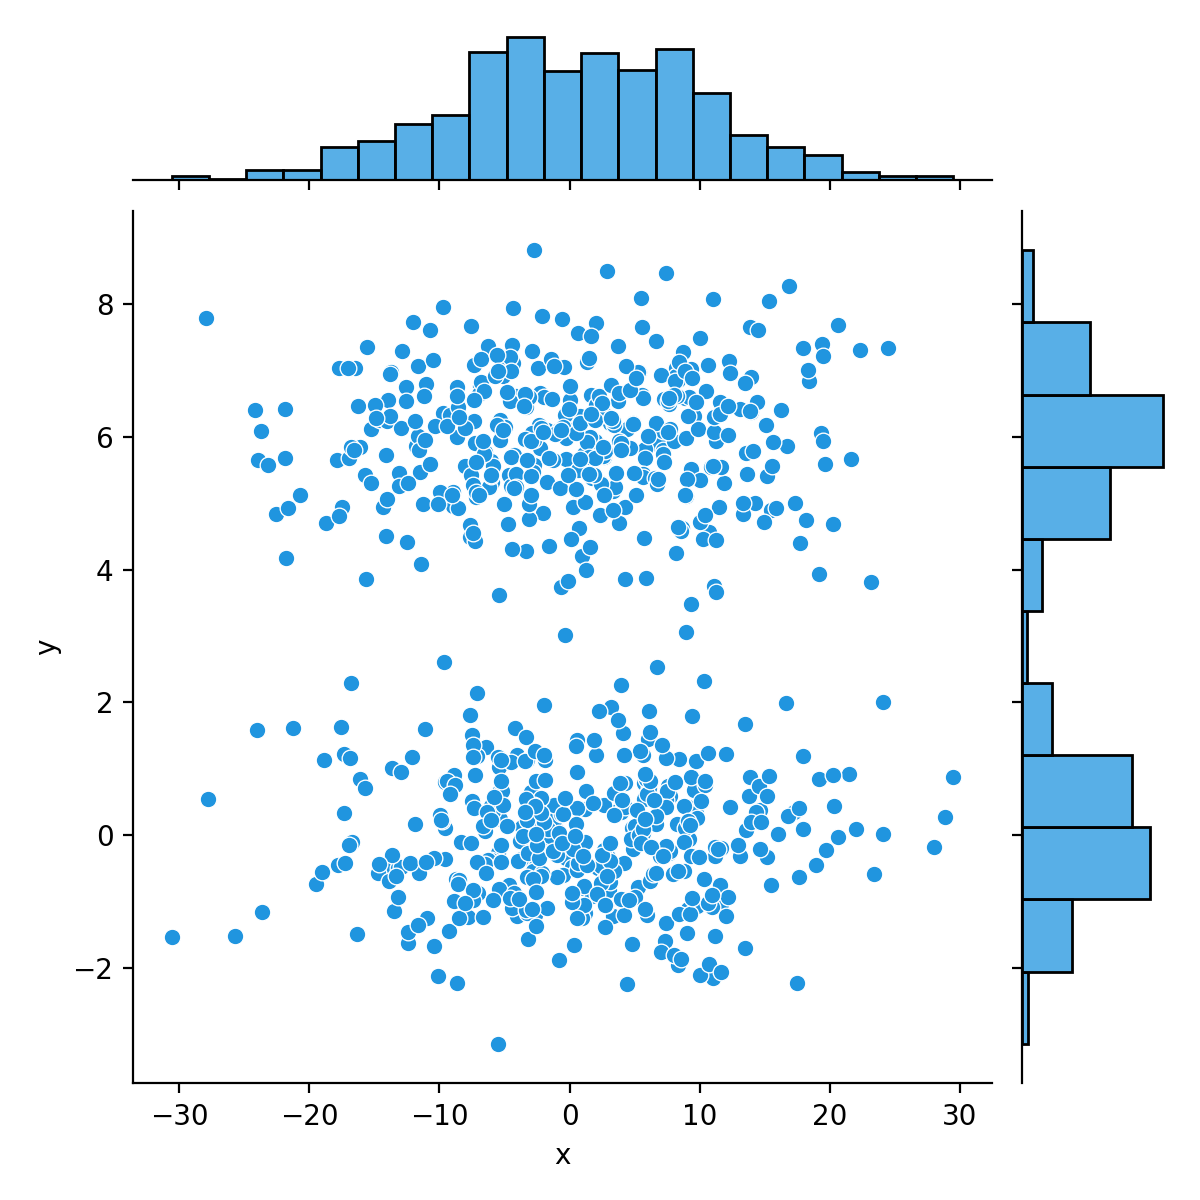

In [51]:
plt.figure(figsize=(6,12))
sns.jointplot(x='x',y='y',data=goog)

### Call me crazy, but there seem to be two clusters

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [36]:
# sklearn implementation of KMeans
#define the thing
kmeans = KMeans(n_clusters=2)
# fit the thing
kmeans.fit(goog)
# Use (predict using) the thing 
kmeans.predict(goog)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [37]:
goog['cluster'] = kmeans.predict(goog)

In [38]:
goog.head()

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0


<AxesSubplot:xlabel='x', ylabel='y'>

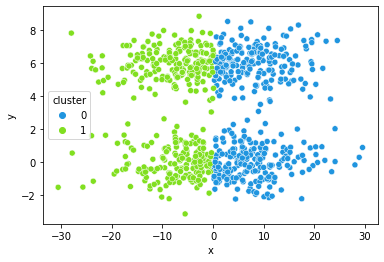

In [39]:
sns.scatterplot(x='x',y='y',data=goog, hue='cluster')

d) Repeat the step above but with scaled data. 

In [40]:
# Scale goog

goog.drop(columns=['cluster'],inplace=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(goog)

goog_scaled = pd.DataFrame(scaler.transform(goog), columns= goog.columns).set_index([goog.index.values])


In [41]:
goog.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [42]:
goog_scaled.head()

,x,y
0,-0.419211,-0.904027
1,-0.821099,-0.368472
2,-0.708466,-0.920978
3,0.729546,-0.756937
4,1.694464,-0.833249


In [43]:
# sklearn implementation of KMeans
#define the thing
kmeans_scaled = KMeans(n_clusters=2, random_state = 123, verbose = 0)
# fit the thing
kmeans_scaled.fit(goog_scaled)
# Use (predict using) the thing 
kmeans_scaled.predict(goog_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
# goog.drop(columns=['cluster'], inplace=True)
goog_scaled['cluster'] = kmeans_scaled.predict(goog_scaled)
goog_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,1
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,1
3,0.729546,-0.756937,1
4,1.694464,-0.833249,1


<AxesSubplot:xlabel='x', ylabel='y'>

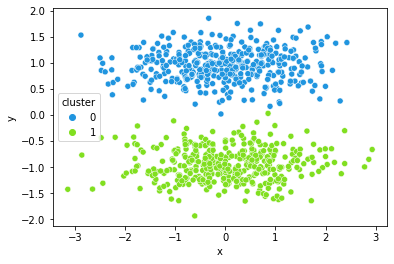

In [45]:
sns.scatterplot(x='x',y='y',data=goog_scaled, hue='cluster')

c) Write down the takeaways from this exercise.

## Takeaways: scaling helps!

Specifically: the difference in size of the x scale vs y scale made all the difference in correctly clustering the data or not